<a href="https://colab.research.google.com/github/YMMM98/Deep-learning_Tools/blob/main/Visualizing_Filters_of_a_CNN(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
print("Tensorflow Version is :", tf.__version__)

Tensorflow Version is : 2.6.0


In [3]:
model = tf.keras.applications.vgg16.VGG16(
    include_top = False, input_shape=(96,96,3), weights ="imagenet"
)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

##Layer Output

In [4]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output,
  )

get_submodel("block1_conv2").summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


##Image Visualization

In [5]:
def create_image():
  return tf.random.uniform((96,96,3),minval=-0.5, maxval=0.5)
#Generating random image
def plot_image(image,title="random"):
  image= image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.title(random)
  plt.show()

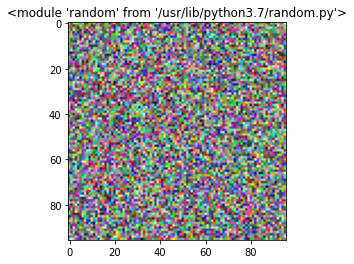

In [6]:
image = create_image()
plot_image(image)

In [7]:
def visualize_filter(layer_name,f_index=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0,num_filters-1)
  assert num_filters > f_index, 'f_index is out of bounds'


## Results